## Imports

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from math import sin, cos, pi
from random import choices

## Load Data

In [2]:
data_points = pd.read_csv("data2.csv")
data_points.head()

,0.5465459227561951,0.5765990614891052,0.5801804065704346,0.5796080827713013,0.4122895896434784,0.5915023684501648,0.4320610463619232,0.5210656523704529,0.3880786895751953,0.5156660676002502,...,0.4575604796409607,0.4343312680721283,0.569340169429779,0.4598301351070404,0.47252416610717773,0.46712827682495117,0.4394141137599945,0.46913790702819824,0.4742763340473175,0.44562989473342896


## Convert to Cartesian

In [40]:
data = []
angels = []
for index, x in enumerate(list(data_points.columns)):
    if 'inf' not in x:
        data.append(float(x))
        angels.append(index)
# data = [float(x) for x in list(data_points.columns) if 'inf' not in x]

In [41]:
len(data)

352

In [42]:
# angles = range(0, 90)

In [47]:
all_points = []
for i, angle in enumerate(angels):
    if angle >= 90:
        break
    theta = angles[i] * pi / 180
    current_y = round(sin(theta) * data[i], 5)
    current_x = round(cos(theta) * data[i], 5)
    all_points.append((current_x, current_y))

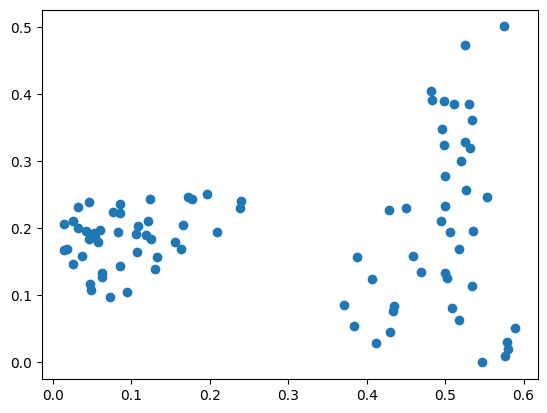

In [48]:
# points = [point for point in all_points]
xs = [point[0] for point in all_points]
ys = [point[1] for point in all_points]

plt.scatter(xs, ys)
plt.show()

## Pseudo-Inverse Regression

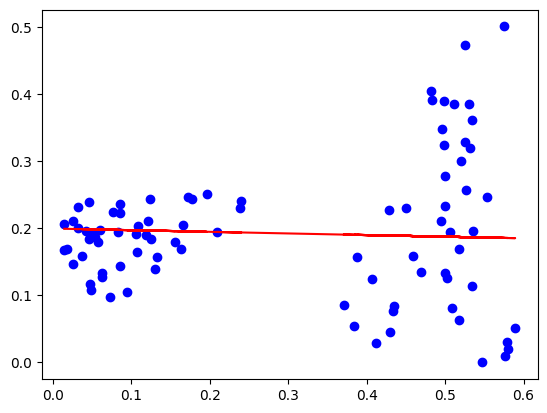

In [49]:
points_ar = np.array(points)
c = np.ones(len(points)).reshape(len(points), 1)
inv = np.linalg.inv(np.dot(points_ar.T, points_ar))
p = np.dot(np.dot(inv, points_ar.T), c)

a = p[0][0]
b = p[1][0]
line_x = [0, 1/a]
line_y = [1/b, 0]
y = [1/b-(a/b)*x for x in xs]
plt.scatter(xs, ys, c='blue')
plt.plot(xs, y, c='red')
plt.show()

## RANSAC

### Config

In [63]:
d = 0.001
iteration_count = 1000

### Algorithm

In [64]:
def calculate_inlier(p1_ar, p2_ar, all_points, d):
    inliers_count = 0
    for point in all_points:
        distance = (
            np.linalg.norm(
                np.cross(p2_ar - p1_ar, p1_ar - point)
            ) / np.linalg.norm(p2_ar - p1_ar)
        )
        if distance < d:
            inliers_count += 1
    return inliers_count


In [65]:
lines = []
inlier_counts = []
for i in range(iteration_count):
    point_1, point_2 = choices(points, k=2)
    p1_ar = np.array(point_1)
    p2_ar = np.array(point_2)
    line_inlier_count = calculate_inlier(p1_ar, p2_ar, points, d)
    lines.append((p1_ar, p2_ar))
    inlier_counts.append(line_inlier_count)
    

<ipython-input-64-d59504c9a670>:5: RuntimeWarning: invalid value encountered in double_scalars
  np.linalg.norm(


In [66]:
best_line_index = np.argmax(inlier_counts)
point_1, point_2 = lines[best_line_index]

In [67]:
x1, y1 = point_1
x2, y2 = point_2

m = (y2 - y1) / (x2 - x1)
b = (y1 * x2 - y2 * x1) / (x2 - x1)
y = [m * x + b for x in xs]

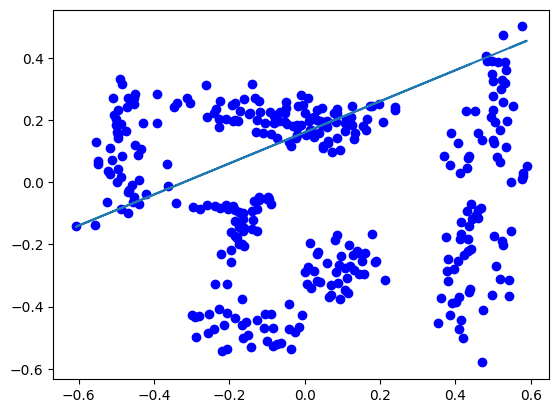

In [68]:
plt.scatter(xs, ys, c='blue')
plt.plot(xs, y)
plt.show()

## Split & Merge

### Config

In [69]:
distance_threshold = 0.01

### Data Preparation

In [70]:
angles = range(0, len(data))

In [71]:
all_points = []
for i in range(len(data)):
    theta = angles[i] * pi / 180
    current_y = round(sin(theta) * data[i], 5)
    current_x = round(cos(theta) * data[i], 5)
    all_points.append((current_x, current_y))

In [72]:
xs = [point[0] for point in all_points]
ys = [point[1] for point in all_points]

### Algorithm

In [73]:
def find_max_distance(begin_index, end_index): 
    max_distance = 0 
    index = 0
    point_1 = np.array(all_points[begin_index])
    point_2 = np.array(all_points[end_index])
    for i, point in enumerate(all_points[begin_index:end_index+1]): 
        point = np.array(point)
        distance = (
            np.linalg.norm(
                np.cross(
                    point_2 - point_1, point_1 - point))
            /np.linalg.norm(point_2 - point_1)
        )
        if distance > max_distance: 
            max_distance = distance 
            index = i + begin_index
            
    return index, max_distance 

In [74]:
L = []
split = []
L.append((0, len(all_points) - 1))
line_x_points = []
line_y_points = []
while len(L) > 0:
    s = L.pop(0)
    point_1 = all_points[s[0]]
    point_2 = all_points[s[1]]
    index, max_distance = find_max_distance(s[0], s[1])
    if (max_distance<distance_threshold): 
        split.append(s)
    else: 
        L.append((s[0], index))
        L.append((index, s[1]))

No handles with labels found to put in legend.


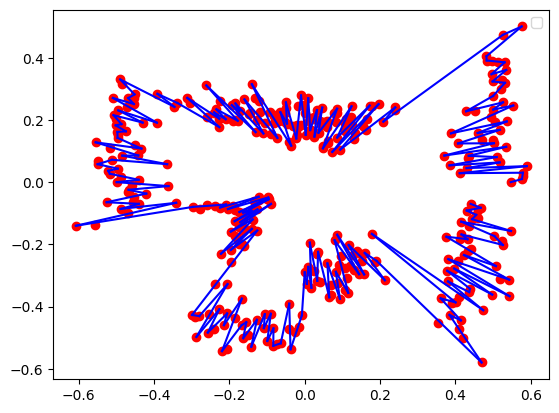

In [75]:
x_plot = []
y_plot = []
for line in split:
    (x1, y1) = all_points[line[0]]
    (x2, y2) = all_points[line[1]]
    plt.plot([x1, x2], [y1, y2], color = 'blue')
plt.scatter(xs, ys, color='red')
plt.legend()
plt.show()

In [76]:
def find_distance_from_line(begin_index, end_index): 
    distance = 0 
    point_1 = np.array(all_points[begin_index])
    point_2 = np.array(all_points[end_index])
    for point in points[begin_index:end_index + 1]: 
        point = np.array(point)
        distance += (
            np.linalg.norm(
                np.cross(point2 - point1, point_1 - point))
            /np.linalg.norm(point_2 - point_1)
        )
    return distance 

In [77]:
number_of_lines = len(split) - 1